In [1]:
import sys  
sys.path.insert(0, '../Libraries/') 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Weather data
* Source: https://www.visualcrossing.com/ Fee for uploading more than 100 lines of info. Please contact me with your needs, I will happily pay for your data
* Units: Wind is km/h, Temperature Celsius, Solar Radiation W/m^2


In [12]:
Location = ['Bend, OR', 'Minneapolis, MN', 'Randolph, VT', 'Soldier Hollow, UT']


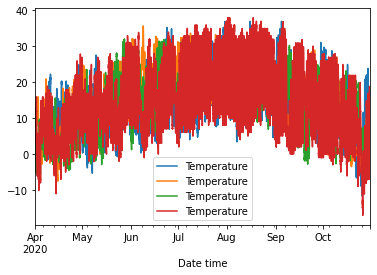

In [14]:
# loc = Location[0]
for loc in Location:
    weather = pd.read_excel("Climate/April-October-2020.xlsx",sheet_name=loc,header=0,date_parser=[5],)
    weather = weather.set_index('Date time')
    if loc == Location[0]:
        ax0 = weather.plot(y='Temperature')
    else:
        weather.plot(y='Temperature',ax = ax0)
# weather['Solar Radiation'] = weather['Solar Radiation'].fillna(0.0)